# **Exploratory Data Analysis**

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [162]:
# Import the training file
'''df_train = pd.read_parquet(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/train.parquet"
)
df_test = pd.read_parquet(
    "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/data/final_test.parquet"
)'''
df_train = pd.read_parquet(
    "/Users/srazjman/Python/bike_counters/data/train.parquet"
)
df_test = pd.read_parquet(
    "/Users/srazjman/Python/bike_counters/data/final_test.parquet"
)
# df_train = pd.read_parquet("/Users/srazjman/Python/bike_counters/data/train.parquet")
df_train.head()

,counter_id,counter_name,site_id,site_name,bike_count,date,counter_installation_date,coordinates,counter_technical_id,latitude,longitude,log_bike_count
48321,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 02:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48324,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,1.0,2020-09-01 03:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.693147
48327,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,0.0,2020-09-01 04:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,0.000000
48330,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,4.0,2020-09-01 15:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,1.609438
48333,100007049-102007049,28 boulevard Diderot E-O,100007049,28 boulevard Diderot,9.0,2020-09-01 18:00:00,2013-01-18,"48.846028,2.375429",Y2H15027244,48.846028,2.375429,2.302585


### **EDA of External Data : weather data**

In [163]:
weather = pd.read_csv(
   # "/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/weather_data.csv.gz",
   "/Users/srazjman/Python/bike_counters/external_data/weather_data.csv.gz",
    parse_dates=["AAAAMMJJHH"],
    date_format="%Y%m%d%H",
    compression="gzip",
    sep=";",
).rename(columns={"AAAAMMJJHH": "date"})

In [164]:
weather.head()

,NUM_POSTE,NOM_USUEL,LAT,LON,ALTI,date,RR1,QRR1,DRR1,QDRR1,...,INS,QINS,INS2,QINS2,TLAGON,QTLAGON,TVEGETAUX,QTVEGETAUX,ECOULEMENT,QECOULEMENT
0,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 00:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 01:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 02:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 03:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,75106001,LUXEMBOURG,48.844667,2.333833,46,2020-01-01 04:00:00,0.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [165]:
weather.shape

(156599, 204)

In [166]:
# Filter weather data to only include rows relevant to the train and test set
weather = weather[
    (weather["date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (weather["date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [167]:
weather.shape

(58246, 204)

In [168]:
weather.nunique()

NUM_POSTE      6
NOM_USUEL      6
LAT            5
LON            5
ALTI           5
              ..
QTLAGON        0
TVEGETAUX      0
QTVEGETAUX     0
ECOULEMENT     0
QECOULEMENT    0
Length: 204, dtype: int64

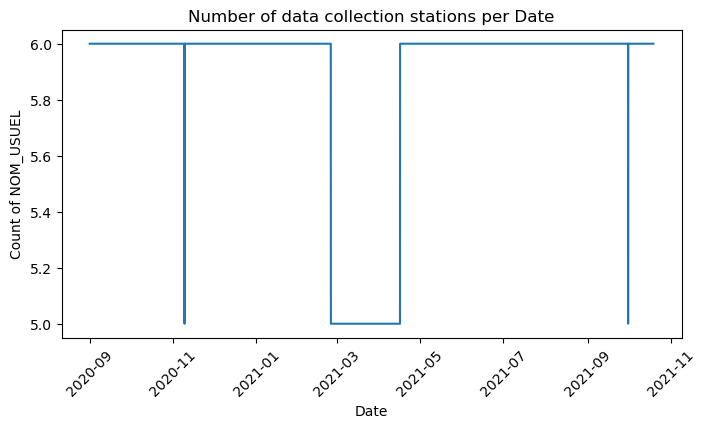

In [169]:
# check the number of stations :
plt.figure(figsize=(8, 4))
plt.plot(weather.groupby("date")["NOM_USUEL"].count(), linestyle="-")
plt.title("Number of data collection stations per Date")
plt.xlabel("Date")
plt.ylabel("Count of NOM_USUEL")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

#### Missing values : 

In [170]:
# 1. Some columns are full with NaN values :

# Identify columns where all values are NaN
empty_columns = weather.columns[weather.isnull().all()]

# Print the names of these columns
print(f"Columns with no values: {empty_columns.tolist()}")

Columns with no values: ['FF2', 'QFF2', 'DD2', 'QDD2', 'FXI2', 'QFXI2', 'DXI2', 'QDXI2', 'HXI2', 'QHXI2', 'DXI3S', 'DHUMEC', 'QDHUMEC', 'GEOP', 'QGEOP', 'N', 'QN', 'NBAS', 'QNBAS', 'CL', 'QCL', 'CM', 'QCM', 'CH', 'QCH', 'N1', 'QN1', 'C1', 'QC1', 'B1', 'QB1', 'N2', 'QN2', 'C2', 'QC2', 'B2', 'QB2', 'N3', 'QN3', 'C3', 'QC3', 'B3', 'QB3', 'N4', 'QN4', 'C4', 'QC4', 'B4', 'QB4', 'W1', 'QW1', 'W2', 'QW2', 'SOL', 'QSOL', 'SOLNG', 'QSOLNG', 'TMER', 'QTMER', 'VVMER', 'QVVMER', 'ETATMER', 'QETATMER', 'DIRHOULE', 'QDIRHOULE', 'HVAGUE', 'QHVAGUE', 'PVAGUE', 'QPVAGUE', 'HNEIGEF', 'QHNEIGEF', 'TSNEIGE', 'QTSNEIGE', 'TUBENEIGE', 'QTUBENEIGE', 'HNEIGEFI3', 'QHNEIGEFI3', 'HNEIGEFI1', 'QHNEIGEFI1', 'ESNEIGE', 'QESNEIGE', 'CHARGENEIGE', 'QCHARGENEIGE', 'DIR', 'QDIR', 'DIR2', 'QDIR2', 'DIF', 'QDIF', 'DIF2', 'QDIF2', 'UV', 'QUV', 'UV2', 'QUV2', 'UV_INDICE', 'QUV_INDICE', 'INFRAR', 'QINFRAR', 'INFRAR2', 'QINFRAR2', 'TLAGON', 'QTLAGON', 'TVEGETAUX', 'QTVEGETAUX', 'ECOULEMENT', 'QECOULEMENT']


In [171]:
# 2. Some columns have

# Calculate the total number of missing values per column
na_counts = weather.isnull().sum()

# Filter for columns with more than 10 missing values
columns_with_na = na_counts[na_counts > 10]

# Calculate the percentage of missing values per column
na_percentage = (columns_with_na / len(weather)) * 100

# Combine counts and percentages into a DataFrame for better display
na_summary = pd.DataFrame(
    {"Number of NAs": columns_with_na, "Percentage of NAs": na_percentage}
)

# Sort the summary in descending order based on the number of missing values
na_summary = na_summary.sort_values(by="Number of NAs", ascending=True)

# Display the summary
na_summary.head(80)

,Number of NAs,Percentage of NAs
DG,34,0.058373
QDG,34,0.058373
HTX,84,0.144216
HTN,84,0.144216
QHTX,84,0.144216
...,...,...
PSTAT,48335,82.984239
PMER,48335,82.984239
QWW,48338,82.989390
WW,48338,82.989390


In [172]:
# Solution : we drop the columns with full NAs and we interpolate the very few missing values left :
weather_reduced = (
    weather.drop(columns=["NUM_POSTE", "NOM_USUEL", "LAT", "LON", "QDXI3S"])
    .groupby("date")
    .mean()
    .dropna(axis=1, how="all")
    .interpolate(method="linear")
)

### Statistics and distributions of the dataset : 

In [173]:
# Basic statistics of the numerical columns
numerical_columns = weather_reduced.select_dtypes(include=["float64", "int64"]).columns
df_external_numerical = weather_reduced[numerical_columns]

df_external_numerical.describe()

,ALTI,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,QDD,FXY,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
count,9911.000000,9911.000000,9911.0,9911.00000,9911.000000,9911.000000,9911.000000,9911.000000,9911.0,9911.000000,...,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000,9911.000000
mean,95.703763,0.084862,1.0,4.93825,8.908788,3.988096,1.002960,179.420005,1.0,4.842115,...,0.012915,8.874079,48.920997,8.997175,48.914136,8.996771,12.960801,8.997578,12.963071,8.997175
std,15.026301,0.489906,0.0,14.23178,0.620987,1.914488,0.088795,90.885561,0.0,2.076287,...,0.134152,0.995796,75.792628,0.106272,75.775356,0.113604,21.138612,0.098394,21.154793,0.106272
min,55.600000,0.000000,1.0,0.00000,3.000000,0.000000,1.000000,0.000000,1.0,0.350000,...,0.000000,1.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000,0.000000,5.000000
25%,101.333333,0.000000,1.0,0.00000,9.000000,2.500000,1.000000,110.000000,1.0,3.266667,...,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000,0.000000,9.000000
50%,101.333333,0.000000,1.0,0.00000,9.000000,3.850000,1.000000,196.666667,1.0,4.700000,...,0.000000,9.000000,1.000000,9.000000,1.000000,9.000000,0.000000,9.000000,0.000000,9.000000
75%,101.333333,0.000000,1.0,0.00000,9.000000,5.266667,1.000000,236.666667,1.0,6.233333,...,0.000000,9.000000,77.000000,9.000000,77.500000,9.000000,21.500000,9.000000,21.500000,9.000000
max,101.333333,20.325000,1.0,60.00000,9.000000,13.600000,3.666667,360.000000,1.0,14.900000,...,4.000000,9.000000,335.500000,9.000000,334.500000,9.000000,60.000000,9.000000,60.000000,9.000000


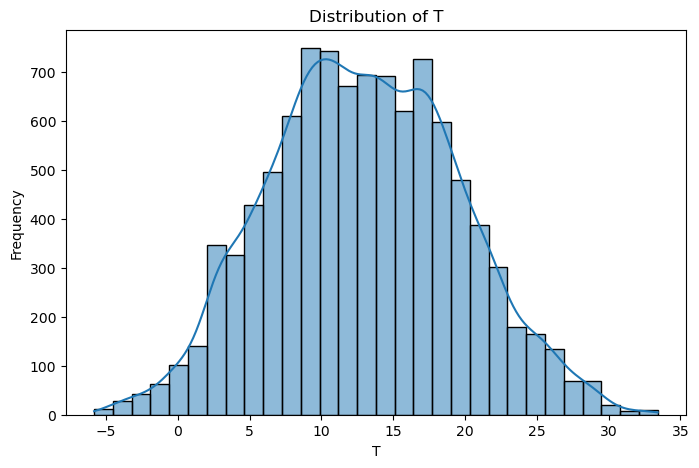

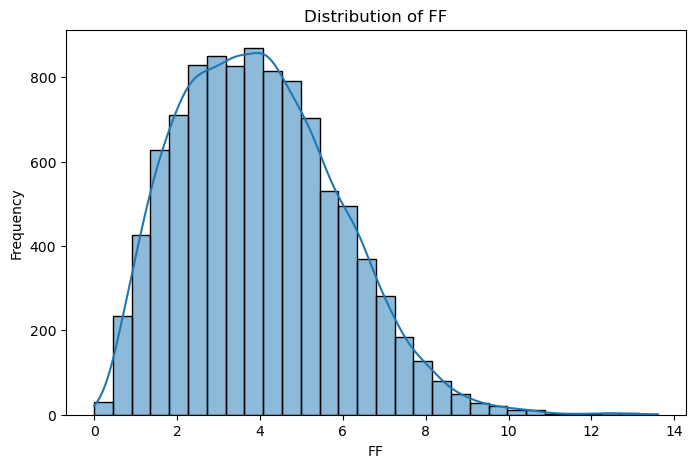

In [174]:
# for col in ['T', 'FF', 'RR24', 'ht_neige','etat_sol']:
for col in ["T", "FF"]:
    if col in df_external_numerical.columns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df_external_numerical[col], kde=True, bins=30)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()

## (DONE POUR NEW DATA SET = UPDATED) : Correlation analysis between weather features and our target variable, log_bike_count :

In [175]:
# We decide to merge this weather data set with the training and testing set to look at the correlation between these weather features
# and log bike count

df_train_merged_1 = df_train.merge(weather_reduced, left_on="date", right_on="date", how="left")


In [176]:
df_train_filtered = df_train_merged_1.drop(columns=['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date',
       'counter_technical_id', 'latitude', 'longitude'])

In [179]:
df_train_filtered.columns

Index(['coordinates', 'log_bike_count', 'ALTI', 'RR1', 'QRR1', 'DRR1', 'QDRR1',
       'FF', 'QFF', 'DD', 'QDD', 'FXY', 'QFXY', 'DXY', 'QDXY', 'HXY', 'QHXY',
       'FXI', 'QFXI', 'DXI', 'QDXI', 'HXI', 'QHXI', 'FXI3S', 'QFXI3S',
       'HFXI3S', 'QHFXI3S', 'T', 'QT', 'TD', 'QTD', 'TN', 'QTN', 'HTN', 'QHTN',
       'TX', 'QTX', 'HTX', 'QHTX', 'DG', 'QDG', 'T10', 'QT10', 'T20', 'QT20',
       'T50', 'QT50', 'T100', 'QT100', 'TNSOL', 'QTNSOL', 'TN50', 'QTN50',
       'TCHAUSSEE', 'QTCHAUSSEE', 'U', 'QU', 'UN', 'QUN', 'HUN', 'QHUN', 'UX',
       'QUX', 'HUX', 'QHUX', 'DHUMI40', 'QDHUMI40', 'DHUMI80', 'QDHUMI80',
       'TSV', 'QTSV', 'PMER', 'QPMER', 'PSTAT', 'QPSTAT', 'PMERMIN',
       'QPMERMIN', 'VV', 'QVV', 'DVV200', 'QDVV200', 'WW', 'QWW', 'NEIGETOT',
       'QNEIGETOT', 'GLO', 'QGLO', 'GLO2', 'QGLO2', 'INS', 'QINS', 'INS2',
       'QINS2'],
      dtype='object')

In [178]:
# Calculate correlations between each feature and log_bike_count
df_external_num_without_coordinates = df_train_filtered.drop(['coordinates'])
correlations = df_external_num_without_coordinates.corr()

# Extract correlations of each feature with log_bike_count
log_bike_count_corr = correlations["log_bike_count"]

# Filter correlations where absolute value is greater than 0.5
log_bike_count_corr_filtered = log_bike_count_corr[log_bike_count_corr.abs() > 0.25]

# Sort the correlations in descending order
log_bike_count_corr_sorted = log_bike_count_corr_filtered.sort_values(ascending=False)

# Display the correlations
log_bike_count_corr_sorted

KeyError: "['coordinates'] not found in axis"

In [106]:
# Filter correlations where absolute value is greater than 0.05
log_bike_count_corr_filtered = log_bike_count_corr[log_bike_count_corr.abs() < 0.05]

# Sort the correlations in descending order
log_bike_count_corr_sorted = log_bike_count_corr_filtered.sort_values(ascending=False)

# Display the correlations
log_bike_count_corr_sorted

Series([], Name: log_bike_count, dtype: float64)

In [107]:
# we decide to remove variables that are almost not correlated with log_bike count : here the features with corr < 0.05 in absolute value
print(weather_reduced.shape)
weather_reduced = weather_reduced.drop(columns=["PSTAT", "DD", "PMER", "PMERMIN", "QNEIGETOT", "QTCHAUSSEE", "ALTI", "QDRR1", "DXY", "FXY", "QTNSOL", "QPMER", "DXI", "QFF", 'QGLO2', "QGLO", "FF", "QHFXI3S", "QINS2", "QINS", "QFXI3S", "RR1", "NEIGETOT"])
print(weather_reduced.shape)

(9911, 91)
(9911, 68)


## Correlation between the remaining weather features : (we suspect strong multicolinearity in this data set)

In [108]:
# Compute the correlation matrix
correlation_matrix = weather_reduced.corr()

# Filter correlations greater than 0.3 and exclude diagonal (self-correlation)
correlations_above_threshold = correlation_matrix.where(
    (correlation_matrix > 0.3) & (correlation_matrix != 1)
)

# Print the filtered correlations
for col in correlations_above_threshold.columns:
    high_corrs = correlations_above_threshold[col].dropna()
    if not high_corrs.empty:
        print(f"Correlations for {col}:")
        print(high_corrs)
        print("\n")

Correlations for DRR1:
U          0.323350
UN         0.302680
UX         0.313412
DHUMI80    0.347108
WW         0.792864
Name: DRR1, dtype: float64


Correlations for HXY:
HXI       0.991589
HFXI3S    0.991310
HTN       0.986874
HTX       0.989315
HUN       0.988395
HUX       0.986620
Name: HXY, dtype: float64


Correlations for FXI:
FXI3S    0.970599
Name: FXI, dtype: float64


Correlations for HXI:
HXY       0.991589
HFXI3S    0.998948
HTN       0.992193
HTX       0.995407
HUN       0.994983
HUX       0.992609
Name: HXI, dtype: float64


Correlations for FXI3S:
FXI    0.970599
Name: FXI3S, dtype: float64


Correlations for HFXI3S:
HXY    0.991310
HXI    0.998948
HTN    0.990933
HTX    0.993929
HUN    0.993688
HUX    0.991135
Name: HFXI3S, dtype: float64


Correlations for T:
TD           0.826375
TN           0.996728
TX           0.997875
T10          0.869692
T20          0.838822
T50          0.792006
T100         0.732119
TNSOL        0.939448
TN50         0.986393
TCHAUSSEE   

Intepretation of the results : 

For HXY : we can see that HXI, HFXI3S, HTN, HTX, HUN and HUX are very very strongly correlated with HIX (almost corr = 1). Ultimately, it is useless to keep them all in our data set.  -> We decide to keep HXY 

For FXI : strongly corr with FIX3S. -> we keep FXI

For T : 
- we remove T10,T20,T50,T100 = which are equal to temperature 10cm above the ground, 20cm, ...
- same thing for TNSol and TN50 = equal to temperature below ground
- TCHAUSEE : we remove 
- we remove TN and TX 

For QT ? what does it describe ? QTD , QTN  , QTX   , QU      , QUN     , QUX    , QTSV  ??




In [109]:
weather_reduced = weather_reduced.drop(columns=['HXI', 'HFXI3S', "HTN", "HTX", "HUN", "HUX", "FXI3S", "T10", "T20", "T50", "T100", "TNSOL", "TN50", "TCHAUSSEE", "TN", "TX"])

In [110]:
weather_reduced.shape

(9911, 52)

In [111]:
weather_reduced.nunique()

QRR1           1
DRR1          63
QDD            1
QFXY           1
QDXY           1
HXY         4509
QHXY           1
FXI         1091
QFXI           1
QDXI           1
QHXI           1
T           2659
QT             8
TD           705
QTD            2
QTN            9
QHTN           1
QTX            9
QHTX           1
DG           154
QDG            1
QT10           1
QT20           1
QT50           1
QT100          1
QTN50          1
U            150
QU             2
UN           156
QUN            2
QHUN           1
UX           143
QUX            2
QHUX           1
DHUMI40      113
QDHUMI40       1
DHUMI80      121
QDHUMI80       1
TSV          557
QTSV           2
QPSTAT         1
QPMERMIN       1
VV          3132
QVV            1
DVV200         1
QDVV200        1
WW            22
QWW            1
GLO          629
GLO2         629
INS          120
INS2         120
dtype: int64

In [112]:
# we drop columns full of NAs and columns with only one unique value
weather_reduced = weather_reduced.dropna(axis=1, how='all')

weather_reduced = weather_reduced.loc[:, weather_reduced.nunique(dropna=True) > 1]


In [113]:
weather_reduced.shape

(9911, 26)

In [114]:
weather_reduced.nunique()

DRR1         63
HXY        4509
FXI        1091
T          2659
QT            8
TD          705
QTD           2
QTN           9
QTX           9
DG          154
U           150
QU            2
UN          156
QUN           2
UX          143
QUX           2
DHUMI40     113
DHUMI80     121
TSV         557
QTSV          2
VV         3132
WW           22
GLO         629
GLO2        629
INS         120
INS2        120
dtype: int64

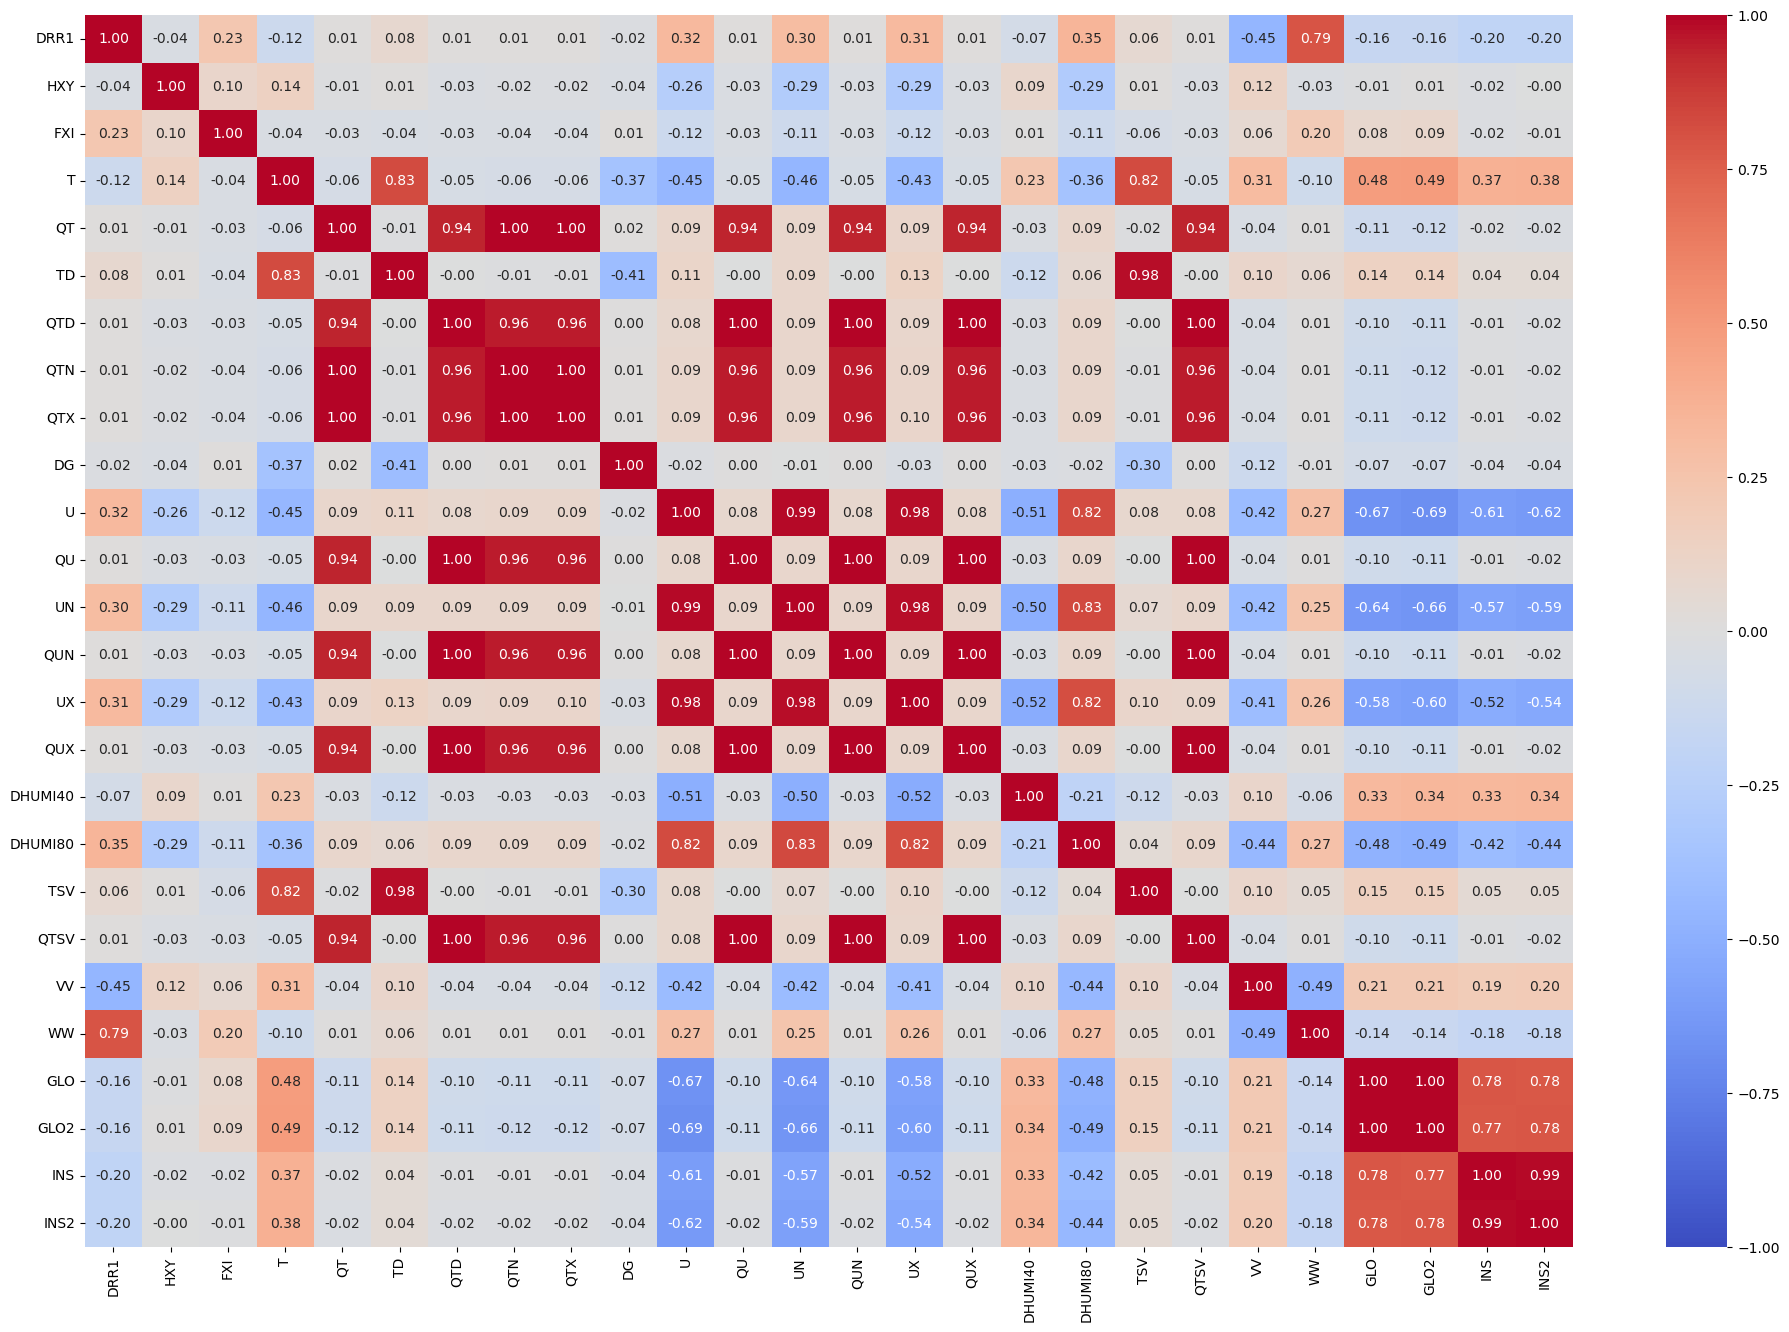

In [115]:
# Compute the correlation matrix
correlation_matrix = weather_reduced.corr()

# Display the filtered correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
)
plt.show()

Analysis of graph : 

For multicolinarity purposes : 

- QT, QTD, QTN, QTX, QU, QUN, QUX, QTSV ultra correlated.   QTD corr of 1 with QU, QUN, QTSV. --> remove QTD and QTN and keep QT. remove QUN, QUX and keep QU
- GLO, GLO2, INS, INS2 ultra corr. remove at least GLO2 and INS2
- U, UN and UX ultra corr. remove UN and UX and keep U

In [116]:
weather_reduced = weather_reduced.drop(columns=["QTD", "QTN", "QUN", "QUX", "QTSV", "QTX", "GLO2", "INS2", "UN", "UX"])

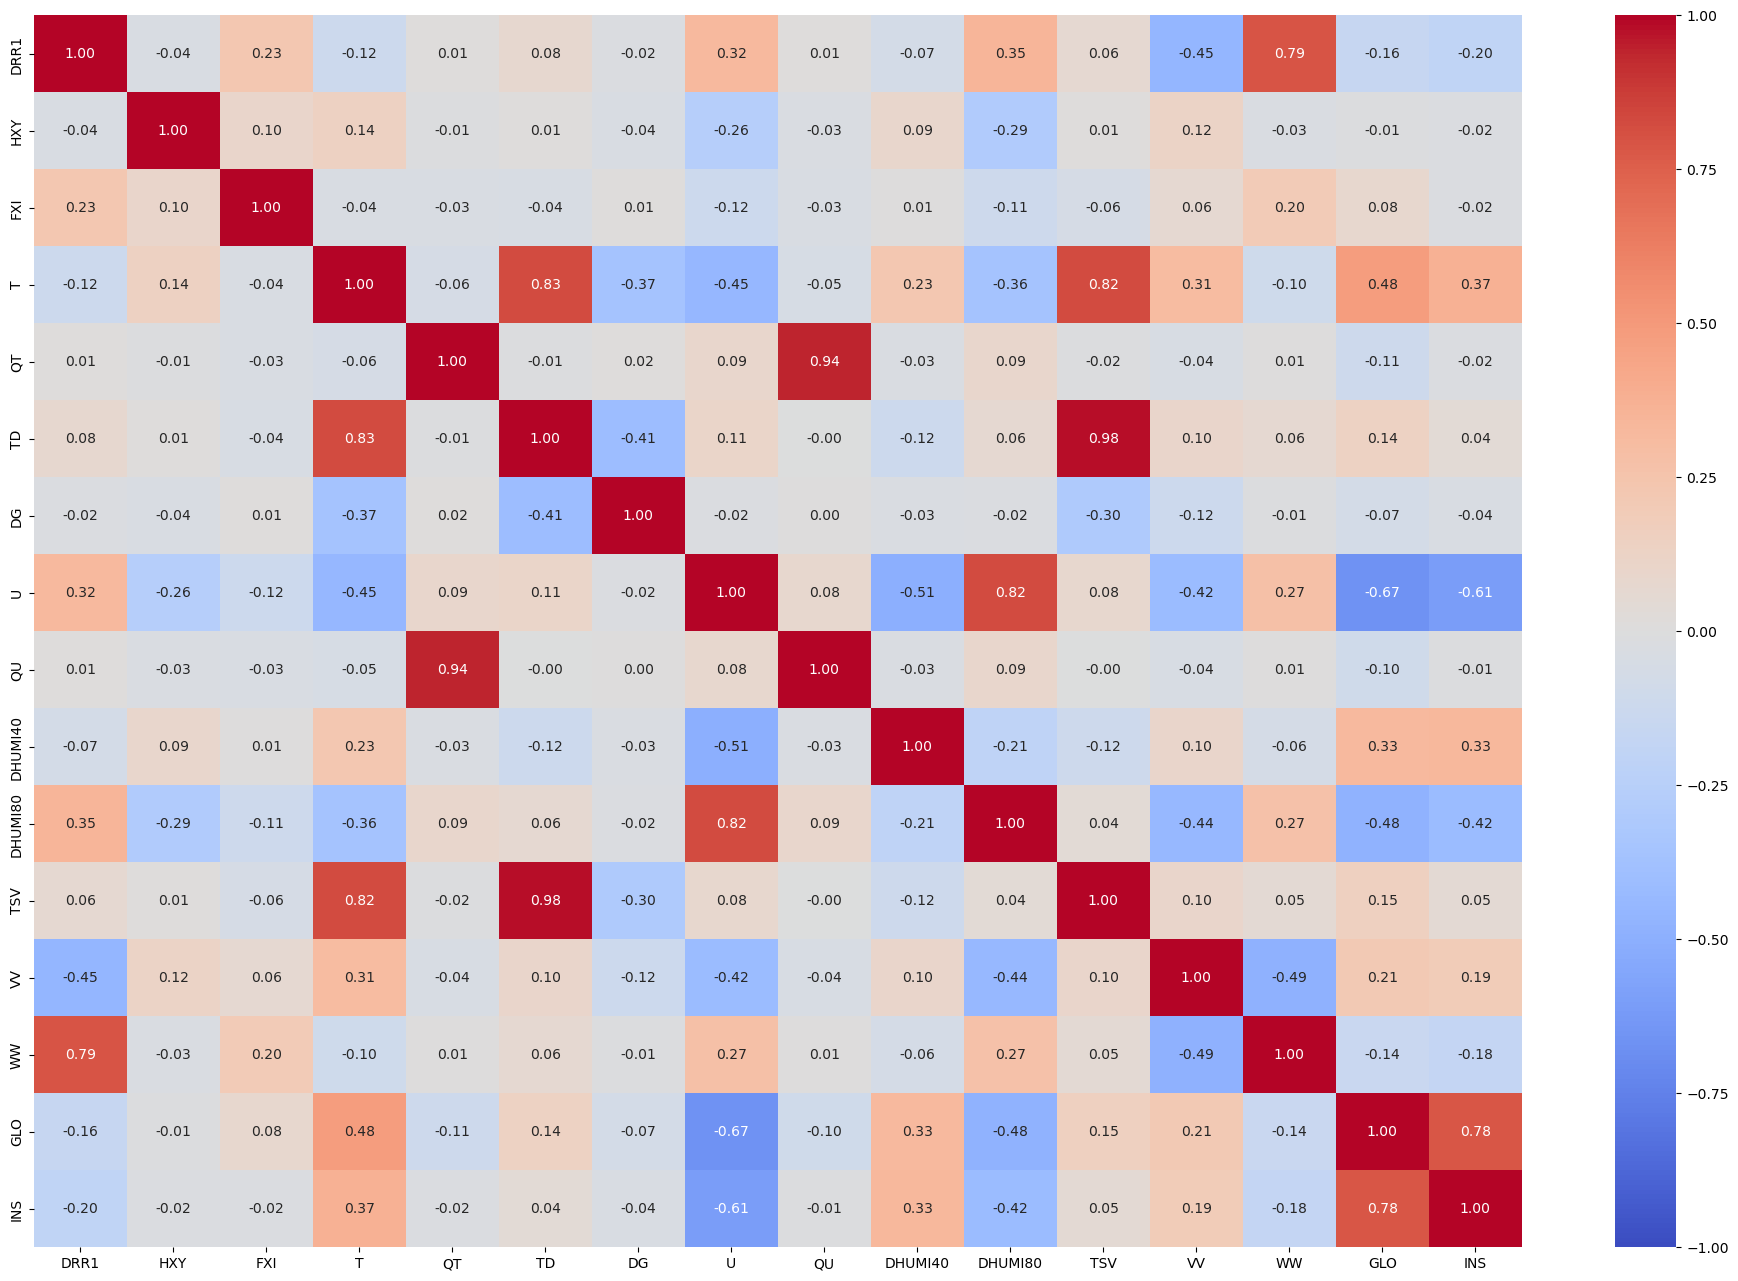

In [117]:
# Compute the correlation matrix
correlation_matrix = weather_reduced.corr()

# Display the filtered correlation matrix
plt.figure(figsize=(24, 16))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1
)
plt.show()

In [118]:
weather_reduced.head()

,DRR1,HXY,FXI,T,QT,TD,DG,U,QU,DHUMI40,DHUMI80,TSV,VV,WW,GLO,INS
date,,,,,,,,,,,,,,,,
2020-09-01 00:00:00,0.0,1557.333333,3.633333,12.933333,1.0,8.40,0.0,82.5,1.0,0.0,30.0,11.05,20000.0,0.0,0.0,0.0
2020-09-01 01:00:00,0.0,15.333333,3.733333,12.683333,1.0,8.90,0.0,86.0,1.0,0.0,30.0,11.40,20000.0,0.0,0.0,0.0
2020-09-01 02:00:00,0.0,140.000000,3.033333,12.250000,1.0,8.55,0.0,87.0,1.0,0.0,30.0,11.15,20000.0,0.0,0.0,0.0
2020-09-01 03:00:00,0.0,243.333333,2.433333,12.133333,1.0,9.00,0.0,89.0,1.0,0.0,59.0,11.45,20000.0,0.0,0.0,0.0
2020-09-01 04:00:00,0.0,348.000000,1.966667,11.616667,1.0,8.45,0.0,90.0,1.0,0.0,60.0,11.05,20000.0,0.0,0.0,0.0


In [119]:
df_train_filtered.head()

,coordinates,log_bike_count,ALTI,RR1,QRR1,DRR1,QDRR1,FF,QFF,DD,...,NEIGETOT,QNEIGETOT,GLO,QGLO,GLO2,QGLO2,INS,QINS,INS2,QINS2
0,"48.846028,2.375429",0.000000,101.333333,0.0,1.0,0.0,9.0,1.400000,1.0,110.000000,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
1,"48.846028,2.375429",0.693147,101.333333,0.0,1.0,0.0,9.0,1.100000,1.0,113.333333,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
2,"48.846028,2.375429",0.000000,101.333333,0.0,1.0,0.0,9.0,1.100000,1.0,103.333333,...,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0,0.0,9.0
3,"48.846028,2.375429",1.609438,101.333333,0.0,1.0,0.0,9.0,3.600000,1.0,30.000000,...,0.0,9.0,104.0,9.0,135.0,9.0,12.0,9.0,21.5,9.0
4,"48.846028,2.375429",2.302585,101.333333,0.0,1.0,0.0,9.0,3.533333,1.0,26.666667,...,0.0,9.0,26.0,9.0,30.5,9.0,24.0,9.0,19.5,9.0


In [ ]:
# Quick analysis of correlation of our features left with log_bike_count :
df_train_merged_2 = df_train.merge(weather_reduced, on="date", how="left")

df_train_filtered = df_train_merged_2.drop(columns=['counter_id', 'counter_name', 'site_id', 'site_name', 'bike_count',
       'date', 'counter_installation_date',
       'counter_technical_id', 'latitude', 'longitude'])

correlations = df_train_filtered.corr()
#enlever les coordinates
log_bike_count_corr = correlations["log_bike_count"]

# Sort the correlations in descending order
log_bike_count_corr_sorted = log_bike_count_corr.sort_values(ascending=False)

# Display the correlations
log_bike_count_corr_sorted

ValueError: could not convert string to float: '48.846028,2.375429'

Global solar radiation (GLO), which is the total amount of shortwave radiation (energy from the sun) received on a horizontal surface, and INS incoming solar radiation are both strongl corr with log_bike count. 

## PCA analysis with weather filtered

#### Important to keep in mind that other way (more relevant) to do PCA is on the full weather data set, not on the filtered one where we have only very few features left

In [121]:
weather_reduced.head()

,DRR1,HXY,FXI,T,QT,TD,DG,U,QU,DHUMI40,DHUMI80,TSV,VV,WW,GLO,INS
date,,,,,,,,,,,,,,,,
2020-09-01 00:00:00,0.0,1557.333333,3.633333,12.933333,1.0,8.40,0.0,82.5,1.0,0.0,30.0,11.05,20000.0,0.0,0.0,0.0
2020-09-01 01:00:00,0.0,15.333333,3.733333,12.683333,1.0,8.90,0.0,86.0,1.0,0.0,30.0,11.40,20000.0,0.0,0.0,0.0
2020-09-01 02:00:00,0.0,140.000000,3.033333,12.250000,1.0,8.55,0.0,87.0,1.0,0.0,30.0,11.15,20000.0,0.0,0.0,0.0
2020-09-01 03:00:00,0.0,243.333333,2.433333,12.133333,1.0,9.00,0.0,89.0,1.0,0.0,59.0,11.45,20000.0,0.0,0.0,0.0
2020-09-01 04:00:00,0.0,348.000000,1.966667,11.616667,1.0,8.45,0.0,90.0,1.0,0.0,60.0,11.05,20000.0,0.0,0.0,0.0


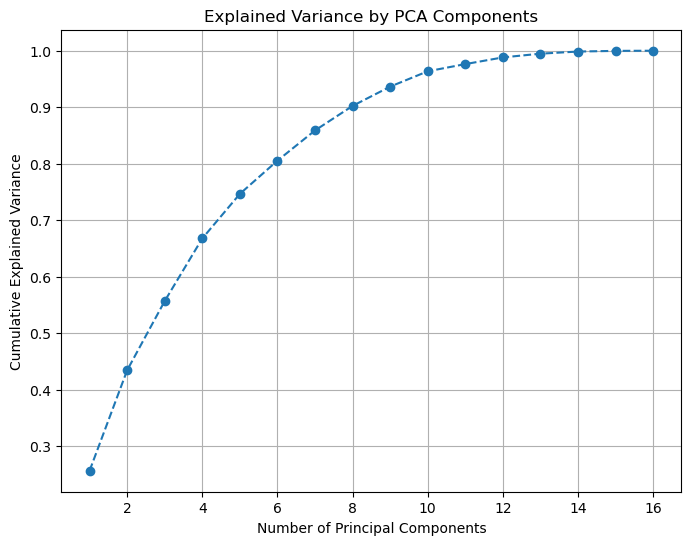

Component 1: 25.66% cumulative explained variance
Component 2: 43.44% cumulative explained variance
Component 3: 55.70% cumulative explained variance
Component 4: 66.77% cumulative explained variance
Component 5: 74.66% cumulative explained variance
Component 6: 80.54% cumulative explained variance
Component 7: 85.89% cumulative explained variance
Component 8: 90.24% cumulative explained variance
Component 9: 93.65% cumulative explained variance
Component 10: 96.36% cumulative explained variance
Component 11: 97.63% cumulative explained variance
Component 12: 98.82% cumulative explained variance
Component 13: 99.48% cumulative explained variance
Component 14: 99.85% cumulative explained variance
Component 15: 99.97% cumulative explained variance
Component 16: 100.00% cumulative explained variance


In [122]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
weather_scaled = scaler.fit_transform(weather_reduced)

# Apply PCA without specifying n_components to get all components
pca = PCA()
pca.fit(weather_scaled)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

# Print explained variance for each component
for i, variance in enumerate(cumulative_explained_variance):
    print(f"Component {i+1}: {variance:.2%} cumulative explained variance")

In [123]:
# We decide to retain 96% of the variance :
n_components = 10
pca = PCA(n_components=n_components)
weather_pca = pca.fit_transform(weather_scaled)

In [124]:
# Convert PCA results to a DataFrame
pca_columns = [f'pca_feature_{i+1}' for i in range(n_components)]
weather_pca_df = pd.DataFrame(weather_pca, columns=pca_columns, index=weather_reduced.index)  # Retain the 'date' index


# TO DO FOR NEW DATA SET SI BESOIN : Outlier management:
For outlier management, we will only consider numerical columns:

In [125]:
'''
numerical_columns = external_data_cleaned.select_dtypes(
    include=["float64", "int64"]
).columns
print(external_data_cleaned[numerical_columns].describe())
'''

'\nnumerical_columns = external_data_cleaned.select_dtypes(\n    include=["float64", "int64"]\n).columns\nprint(external_data_cleaned[numerical_columns].describe())\n'

We look for outliers and we notice for example that the variables rr3, rr6, rr12, rr24 have negative values ​​which is impossible.

Let's apply a z-score test : 

In [126]:
'''
from scipy.stats import zscore
import numpy as np

# calcul of the z-score
z_scores = external_data_cleaned[numerical_columns].apply(zscore)

# possible outlier if: (z-score > 3 or < -3)
outliers = np.abs(z_scores) > 3

outlier_counts = outliers.sum()
print("Nombre d'outliers par colonne :\n", outlier_counts)
'''

'\nfrom scipy.stats import zscore\nimport numpy as np\n\n# calcul of the z-score\nz_scores = external_data_cleaned[numerical_columns].apply(zscore)\n\n# possible outlier if: (z-score > 3 or < -3)\noutliers = np.abs(z_scores) > 3\n\noutlier_counts = outliers.sum()\nprint("Nombre d\'outliers par colonne :\n", outlier_counts)\n'

In [127]:
'''
columns_with_outliers = outlier_counts[outlier_counts > 0].index

# To visualize the outliers :
for col in columns_with_outliers:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=external_data, y=col)
    plt.title(f"Boxplot - {col}")
    plt.ylabel(col)
    plt.show()


plt.tight_layout()
plt.show()
'''

'\ncolumns_with_outliers = outlier_counts[outlier_counts > 0].index\n\n# To visualize the outliers :\nfor col in columns_with_outliers:\n    plt.figure(figsize=(8, 6))\n    sns.boxplot(data=external_data, y=col)\n    plt.title(f"Boxplot - {col}")\n    plt.ylabel(col)\n    plt.show()\n\n\nplt.tight_layout()\nplt.show()\n'

For ff : 
High wind speeds are unusual but possible in extreme weather conditions. Outliers may represent storms or strong winds.

for tend :
Significant pressure changes can happen due to rapid weather transitions, such as storm

for vv : 
High values are generally plausible unless they exceed realistic maximums. max here is 60,000m. 
-> one solution: to create a max : for values above 10,000m for example : leave 10,000m. Indeed, above this threshold, it will not make any difference on whether people would take a bike or not. 

On remarque que certaines variables ne sont pas vraiment des outliers : ex: rr1, rr3, rr6, rr12, rr24( qui correspondent au Cumuls de précipitations sur 1h, 3h, 6h, 12h, 24h (en mm)) : ces variables possèdent simplement une grande disparité de values car elles n'arrivent qu'occasionnellement et aveccdes quantité très disparates.

In [128]:
'''
# We decide to replace negative values for the rr variables with 0
columns_to_modify = ["rr1", "rr3", "rr6", "rr12", "rr24"]

for col in columns_to_modify:
    external_data_cleaned.loc[external_data_cleaned[col] < 0, col] = 0
'''

'\n# We decide to replace negative values for the rr variables with 0\ncolumns_to_modify = ["rr1", "rr3", "rr6", "rr12", "rr24"]\n\nfor col in columns_to_modify:\n    external_data_cleaned.loc[external_data_cleaned[col] < 0, col] = 0\n'

## Creation of scores for groups of weather variables (ex : one group for wind features, another for rain features, ....)

We want to group the variables in groups and create a combination score for each group of variables. For this, we can use simple or weighted aggregation methods depending on the characteristics of the variables and their likely impact on the target (log_bike_count).

In [129]:
weather_reduced.head()

,DRR1,HXY,FXI,T,QT,TD,DG,U,QU,DHUMI40,DHUMI80,TSV,VV,WW,GLO,INS
date,,,,,,,,,,,,,,,,
2020-09-01 00:00:00,0.0,1557.333333,3.633333,12.933333,1.0,8.40,0.0,82.5,1.0,0.0,30.0,11.05,20000.0,0.0,0.0,0.0
2020-09-01 01:00:00,0.0,15.333333,3.733333,12.683333,1.0,8.90,0.0,86.0,1.0,0.0,30.0,11.40,20000.0,0.0,0.0,0.0
2020-09-01 02:00:00,0.0,140.000000,3.033333,12.250000,1.0,8.55,0.0,87.0,1.0,0.0,30.0,11.15,20000.0,0.0,0.0,0.0
2020-09-01 03:00:00,0.0,243.333333,2.433333,12.133333,1.0,9.00,0.0,89.0,1.0,0.0,59.0,11.45,20000.0,0.0,0.0,0.0
2020-09-01 04:00:00,0.0,348.000000,1.966667,11.616667,1.0,8.45,0.0,90.0,1.0,0.0,60.0,11.05,20000.0,0.0,0.0,0.0


First, we wil scale the data and then compute the mean for each group of variables :  

In [130]:
from sklearn.preprocessing import StandardScaler

# Define groups of weather features
groups = {
    "Solar_Radiation_Light": ["GLO", "INS", "VV"],
    "Temperature": ["T", "TSV", "TD"],
    "Humidity": ["DHUMI40", "DHUMI80", "HXY"],
    "Wind": ["U", "QU", "QT", "FXI"],
    "Precipitation": ["DRR1", "WW"]
}

# Create a StandardScaler for normalization
scaler = StandardScaler()

# Add a new feature for each group's score to the DataFrame
for group_name, variables in groups.items():
    standardized_features = scaler.fit_transform(weather_reduced[variables])

    # Calculate the group score as the mean of the standardized features
    weather_reduced[f"{group_name}_Score"] = standardized_features.mean(axis=1)

In [131]:
weather_reduced = weather_reduced.drop(columns=["DG", "GLO", "INS", "VV", "T", "TSV", "TD", "DHUMI40", "DHUMI80", "HXY", "U", "QU", "QT", "FXI", "DRR1", "WW"])
weather_reduced.head()

,Solar_Radiation_Light_Score,Temperature_Score,Humidity_Score,Wind_Score,Precipitation_Score
date,,,,,
2020-09-01 00:00:00,-0.248783,0.028199,0.173515,-0.278030,-0.325474
2020-09-01 01:00:00,-0.248783,0.073541,-0.578650,-0.215821,-0.325474
2020-09-01 02:00:00,-0.248783,0.010594,-0.517839,-0.247432,-0.325474
2020-09-01 03:00:00,-0.248783,0.055650,-0.097302,-0.256427,-0.325474
2020-09-01 04:00:00,-0.248783,-0.035538,-0.033483,-0.272222,-0.325474


### **EDA of External Data : jour fériés data**

In [132]:
jour_feries = pd.read_csv(
    #"/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/jours_feries_metropole.csv",
    "/Users/srazjman/Python/bike_counters/external_data/jours_feries_metropole.csv",
    date_format="%Y%m%d%H",
)

In [133]:
jour_feries.head()

,date,annee,zone,nom_jour_ferie
0,2004-01-01,2004,Métropole,1er janvier
1,2004-04-12,2004,Métropole,Lundi de Pâques
2,2004-05-01,2004,Métropole,1er mai
3,2004-05-08,2004,Métropole,8 mai
4,2004-05-20,2004,Métropole,Ascension


In [134]:
jour_feries.shape

(286, 4)

In [135]:
jour_feries.dtypes

date              object
annee              int64
zone              object
nom_jour_ferie    object
dtype: object

In [136]:
jour_feries.nunique()

date              285
annee              26
zone                1
nom_jour_ferie     11
dtype: int64

In [137]:
jour_feries = jour_feries.drop(columns=["annee", "zone"])


In [138]:
jour_feries['date'] = pd.to_datetime(jour_feries['date'])

In [139]:
jour_feries = jour_feries[
    (jour_feries["date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (jour_feries["date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [140]:
jour_feries.nunique()

date              11
nom_jour_ferie    11
dtype: int64

### **EDA of External Data : mouvements sociaux data**

In [141]:
mouvements_sociaux = pd.read_csv(
    #"/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/mouvements-sociaux-depuis-2002.csv",
    "/Users/srazjman/Python/bike_counters/external_data/mouvements-sociaux-depuis-2002.csv",
    date_format="%Y%m%d%H",
    sep=";"
)

In [142]:
mouvements_sociaux.head()

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
0,2003-04-02,2003-04-04,Participation aux manifestations sur les retra...,"CGT,UNSA,SUD Rail,CFDT,FO","conducteur,agent de manoeuvre,chef de bord,acc...",138412.0,41307.0,29.8
1,2003-05-13,NaN,Rejette toute idée d'allongement de la durée d...,SUD Rail,"conducteur,agent de manoeuvre,chef de bord,acc...",121868.0,31172.0,25.6
2,2003-06-10,NaN,Retraites et salaires.,"CGT,CFDT,FO","conducteur,agent de manoeuvre,chef de bord,acc...",54754.0,8336.0,15.2
3,2004-05-25,2004-05-25,Revendications portant sur les personnels PS25...,SUD Rail,"conducteur,agent de manoeuvre,chef de bord,acc...",125964.0,261.0,0.2
4,2004-09-08,2004-09-10,"Effectifs, conditions de travail, travail de n...",FO,infrastructure,9666.0,488.0,5.0


In [143]:
mouvements_sociaux['Date'] = pd.to_datetime(mouvements_sociaux['Date'])

In [144]:
mouvements_sociaux = mouvements_sociaux[
    (mouvements_sociaux["Date"] >= df_train["date"].min() - datetime.timedelta(hours=1))
    & (mouvements_sociaux["Date"] <= df_test["date"].max() + datetime.timedelta(hours=1))
]

In [145]:
df_train["date"].min()

Timestamp('2020-09-01 01:00:00')

In [146]:
df_test["date"].min()

Timestamp('2021-09-10 01:00:00')

In [147]:
mouvements_sociaux.shape

(5, 8)

In [148]:
mouvements_sociaux

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,NaN,"Salaires, Fret, emploi…","CGT,SUD Rail",NaN,NaN,NaN,11.0
267,2021-03-08,NaN,Journée internationale du droit des femmes,"CGT,SUD Rail",NaN,NaN,NaN,0.7
364,2020-09-17,NaN,Mouvement de rentrée,"CGT,SUD Rail",NaN,NaN,NaN,7.0
456,2021-02-04,NaN,"Crise sanitaire, salaire, recrutement…","CGT,SUD Rail",NaN,NaN,NaN,3.2
457,2021-07-01,NaN,"Emploi, réorganisations, salaires...",CGT,NaN,NaN,NaN,7.4


In [149]:
# no mouvement social for dates corresponding to the test set

# we remove the second raw corresponding to the 2021-03-08 because taux de gréviste = 0.7% which is very little
mouvements_sociaux = mouvements_sociaux[mouvements_sociaux['Date'] != pd.Timestamp('2021-03-08')]


In [150]:
mouvements_sociaux

,Date,date_de_fin,Motif exprimé,Organisations syndicales,Métiers ciblés par le préavis,Population devant travailler ciblee par le préavis,Nombre de grévistes du préavis,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,NaN,"Salaires, Fret, emploi…","CGT,SUD Rail",NaN,NaN,NaN,11.0
364,2020-09-17,NaN,Mouvement de rentrée,"CGT,SUD Rail",NaN,NaN,NaN,7.0
456,2021-02-04,NaN,"Crise sanitaire, salaire, recrutement…","CGT,SUD Rail",NaN,NaN,NaN,3.2
457,2021-07-01,NaN,"Emploi, réorganisations, salaires...",CGT,NaN,NaN,NaN,7.4


In [151]:
mouvements_sociaux = mouvements_sociaux.drop(columns=['date_de_fin', 'Organisations syndicales', 'Métiers ciblés par le préavis', 'Population devant travailler ciblee par le préavis', 'Nombre de grévistes du préavis'])

In [152]:
mouvements_sociaux

,Date,Motif exprimé,Taux de grévistes au sein de la population concernée par le préavis
81,2021-08-05,"Salaires, Fret, emploi…",11.0
364,2020-09-17,Mouvement de rentrée,7.0
456,2021-02-04,"Crise sanitaire, salaire, recrutement…",3.2
457,2021-07-01,"Emploi, réorganisations, salaires...",7.4


# Trafic annuel Ratp 2021

In [153]:
trafic_annuel_2021_ratp = pd.read_csv(
    #"/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/trafic-annuel-entrant-par-station-du-reseau-ferre-2021.csv",
    "/Users/srazjman/Python/bike_counters/external_data/trafic-annuel-entrant-par-station-du-reseau-ferre-2021.csv",
    date_format="%Y%m%d%H",
    sep=";"
)
trafic_annuel_2021_ratp.head()

,Rang,Réseau,Station,Trafic,Correspondance_1,Correspondance_2,Correspondance_3,Correspondance_4,Correspondance_5,Ville,Arrondissement pour Paris
0,6,Métro,BIBLIOTHEQUE,11104474,14,NaN,NaN,NaN,NaN,Paris,13.0
1,10,Métro,CHATELET,8350794,1,4,7,11.0,14.0,Paris,1.0
2,15,Métro,BOBIGNY-PABLO PICASSO,6561327,5,NaN,NaN,NaN,NaN,Bobigny,NaN
3,17,Métro,GARE D'AUSTERLITZ,6318543,5,10,NaN,NaN,NaN,Paris,13.0
4,21,Métro,HAVRE-CAUMARTIN,5894982,3,9,NaN,NaN,NaN,Paris,9.0


In [154]:
trafic_annuel_2021_ratp.shape

(371, 11)

In [155]:
#trafic = nombre de passage par station
annual_number = trafic_annuel_2021_ratp['Trafic']
print(annual_number.head())


0    11104474
1     8350794
2     6561327
3     6318543
4     5894982
Name: Trafic, dtype: int64


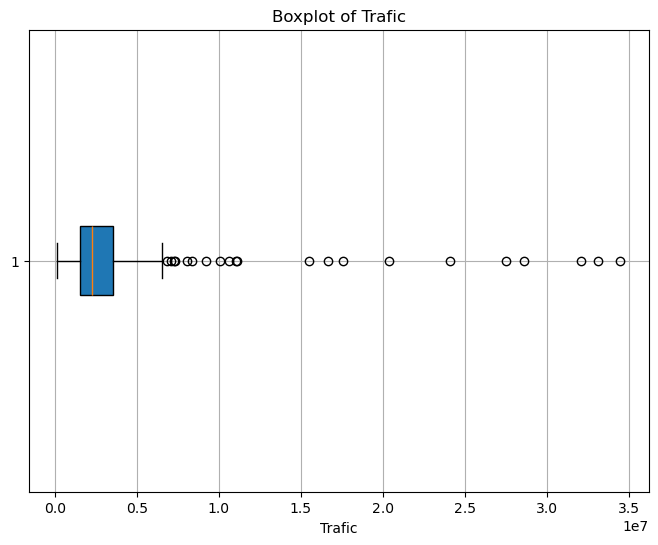

In [156]:
# Afficher un boxplot de la colonne 'Trafic'
plt.figure(figsize=(8, 6))
plt.boxplot(annual_number, vert=False, patch_artist=True)
plt.title('Boxplot of Trafic')
plt.xlabel('Trafic')
plt.grid(True)
plt.show()


On remarque que le dataset est complet

# Liste arrets Ratp

In [157]:
arrets_ratp = pd.read_csv(
    #"/Users/louisleibovici/Documents/VS_Code/Bike_counters DSB Project/bike_counters/external_data/arrets.csv",
    "/Users/srazjman/Python/bike_counters/external_data/arrets.csv",
    date_format="%Y%m%d%H",
    sep=";"
)
print(arrets_ratp.shape)
arrets_ratp.head()

(37723, 16)


,ArRId,ArRVersion,ArRCreated,ArRChanged,ArRName,ArRType,ArRXEpsg2154,ArRYEpsg2154,ArRTown,ArRPostalRegion,ArRAccessibility,ArRAudibleSignals,ArRVisualSigns,ArRFareZone,ZdAId,ArRGeopoint
0,26017,1552664-50372,2014-12-29T15:31:51+01:00,2024-02-20T09:09:31+01:00,Georges Méliès,bus,665555,6859296,Bry-sur-Marne,94015,false,unknown,unknown,4,50372,"48.83279801589687, 2.530765722347192"
1,25986,1552649-1361100,2014-12-29T15:31:51+01:00,2024-02-20T09:06:18+01:00,Rueil - Ville,bus,640021,6864816,Rueil-Malmaison,92063,true,unknown,unknown,3,44784,"48.88056753383792, 2.1821641722239824"
2,25964,1552646-57950,2014-12-29T15:31:51+01:00,2024-02-20T09:05:50+01:00,Paul de Kock,bus,658897,6866020,Romainville,93063,true,unknown,unknown,3,57950,"48.892876288036526, 2.4394182277802083"
3,25809,1552599-50275,2014-12-29T15:31:51+01:00,2024-02-19T15:59:16+01:00,Hôpital Esquirol,bus,658163,6857694,Saint-Maurice,94069,true,unknown,unknown,3,50275,"48.81795342652353, 2.430227301269935"
4,25767,1552569-1352143,2014-12-29T00:00:00+01:00,2024-02-19T15:50:47+01:00,Général Leclerc - Villeneuve - Hôpital Beaujon,bus,649433,6867500,Clichy,92024,true,unknown,unknown,2,50733,"48.90551145068833, 2.310173425079983"


Egaliser les coordinates avec la proximité entre les stations